In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [41]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [43]:
import matplotlib.pyplot as plt

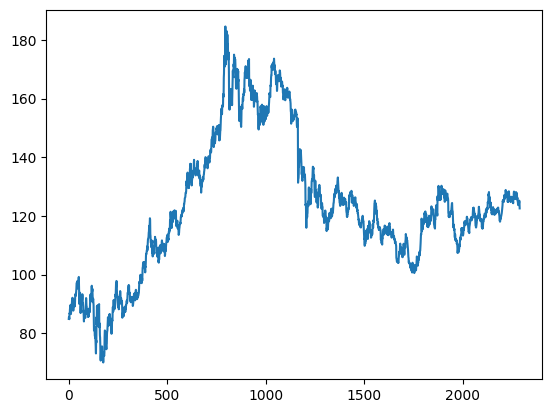

In [44]:
plt.plot(df['GLD'])

In [45]:
X = np.array(df['GLD'])

In [46]:
print(X)

[ 84.860001  85.57      85.129997 ... 125.18     124.489998 122.5438  ]


In [47]:
X.shape

(2290,)

In [12]:
maxlen = 2290

In [27]:
input_sequences = []
for i in range(1,len(X)):
    input_sequences.append(X[:i+1])

In [31]:
len(input_sequences)

2289

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = maxlen, padding='pre')

In [39]:
padded_input_sequences

array([[  0,   0,   0, ...,   0,  84,  85],
       [  0,   0,   0, ...,  84,  85,  85],
       [  0,   0,   0, ...,  85,  85,  84],
       ...,
       [  0,   0,  84, ..., 124, 124, 125],
       [  0,  84,  85, ..., 124, 125, 124],
       [ 84,  85,  85, ..., 125, 124, 122]])

In [42]:
X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

In [46]:
X.shape

(2289, 2289)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [57]:
model = Sequential()
model.add(LSTM(400))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [163]:
model.fit(features,y,epochs=20)

Epoch 1/20
72/72 [==============================] - 3s 4ms/step - loss: 12862.6201 - accuracy: 0.0000e+00
Epoch 2/20
72/72 [==============================] - 0s 4ms/step - loss: 2355.9019 - accuracy: 0.0000e+00
Epoch 3/20
72/72 [==============================] - 0s 4ms/step - loss: 913.0276 - accuracy: 0.0000e+00
Epoch 4/20
72/72 [==============================] - 0s 4ms/step - loss: 844.2389 - accuracy: 0.0000e+00
Epoch 5/20
72/72 [==============================] - 0s 3ms/step - loss: 724.3800 - accuracy: 0.0000e+00
Epoch 6/20
72/72 [==============================] - 0s 4ms/step - loss: 555.1376 - accuracy: 0.0000e+00
Epoch 7/20
72/72 [==============================] - 0s 4ms/step - loss: 449.2513 - accuracy: 0.0000e+00
Epoch 8/20
72/72 [==============================] - 0s 4ms/step - loss: 375.4318 - accuracy: 0.0000e+00
Epoch 9/20
72/72 [==============================] - 0s 4ms/step - loss: 319.4061 - accuracy: 0.0000e+00
Epoch 10/20
72/72 [==============================] - 0s 4ms/s

In [92]:
import numpy as np

# Assuming df is your DataFrame with the data
gold_prices = df['GLD'].values

# Choose the sequence length (e.g., 10)
sequence_length = 10

# Initialize lists to store input sequences and target sequences
input_sequences = []
target_sequences = []

# Normalize the gold price data (Min-Max scaling)
# min_value = np.min(gold_prices)
# max_value = np.max(gold_prices)
# normalized_gold_prices = (gold_prices - min_value) / (max_value - min_value)
normalized_gold_prices = gold_prices

# Create sequences
for i in range(len(normalized_gold_prices) - sequence_length):
    input_seq = normalized_gold_prices[i:i+sequence_length]
    target_seq = normalized_gold_prices[i+sequence_length]
    
    input_sequences.append(input_seq)
    target_sequences.append(target_seq)

# Convert the lists to numpy arrays
input_sequences = np.array(input_sequences)
target_sequences = np.array(target_sequences)



In [69]:
X = input_sequences.reshape(input_sequences.shape[0],input_sequences.shape[1],1)
y = target_sequences

In [162]:
sequence_length = 10

# Create a Sequential model
model = Sequential()

# Add an LSTM layer with 64 units (you can adjust this based on your needs)
model.add(LSTM(units=64,return_sequences=True, input_shape=(5, 1)))

model.add(Dense(units=128,activation='relu'))

# Add a Dense layer with 1 unit for regression
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [65]:
X[1].shape

(10,)

In [75]:
out = model.predict([X[1]])

1/1 [==============================] - 0s 26ms/step


In [154]:
features = df[['SPX', 'USO', 'SLV', 'EUR/USD', 'GLD']][:-10]

In [150]:
features.shape

(2290, 5)

In [158]:
# Assuming 'new_sequence' is a single input sequence of shape (sequence_length, 1)
prediction = model.predict(np.array(features))


72/72 [==============================] - 1s 4ms/step


In [159]:
prediction.shape

(2280, 1)

In [97]:
y = y.reshape(-1,1)

In [98]:
y[1]

array([86.5])

Text(0.5, 1.0, 'predictions')

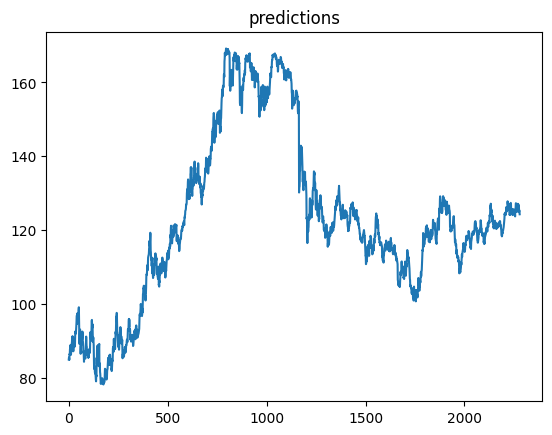

In [160]:
plt.plot(prediction)
plt.title('predictions')

Text(0.5, 1.0, 'Original')

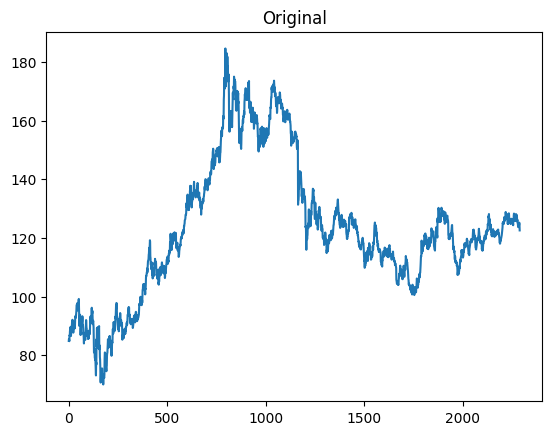

In [161]:
plt.plot(df['GLD'])
plt.title('Original')

In [129]:
X[1]

array([[85.57    ],
       [85.129997],
       [84.769997],
       [86.779999],
       [86.550003],
       [88.25    ],
       [88.580002],
       [89.540001],
       [87.989998],
       [86.699997]])